In [207]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 13 2024
@author: Ishaan Shah (phw6bv)
"""
import scipy
import numpy as np
import pandas as pd
import NetfluxODE_params as params
import NetfluxODE as file
import matplotlib.pyplot as plt
import networkx as nx

[speciesNames, tau, ymax, y0, w, n, EC50] = params.loadParams()
print(speciesNames)
print(len(speciesNames))
print(ymax)
new_ymax = []
for i in range(len(ymax)):
    new_ymax.append(0.5)
ymax = new_ymax
print(ymax)
# print(w)

['PIK3CA', 'ROS', 'Rock2', 'KLF2', 'CCM3', 'MIF', 'NFkB', 'CCM1', 'MEKK3', 'MEK5', 'ERK5', 'NOTCH', 'HEY1', 'HEY2', 'TSP1', 'Thbs1', 'TGFb', 'LGALS3BP', 'GAL3', 'GAL3ACT', 'CCND1', 'MMP9', 'eNOS', 'NO', 'HIF1alpha', 'Ang1', 'Tie2', 'PI3k', 'Akt', 'mTORC1', 'E4BP1', 'eIF4E', 'glutamate', 'GLAST', 'GLT1', 'Cd74', 'MCP1', 'IL18', 'IL1B', 'caspase1', 'NLRP3', 'COX2', 'VEGF', 'GLEXC', 'ANG', 'INFL', 'ASTRPROF', 'HEM']
48
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


## Steady State before CCM

In [208]:
#40 time units that displays the activity of each gene before any perturbation in a normal interaction

tspan = [0, 40] 

sol_dict = {}
t_list = []
y_list = []

sol = scipy.integrate.solve_ivp(file.ODEfunc,tspan,y0,args=(tau,ymax,w,n,EC50,))
sol_dict[1] = sol
t_list.append(sol.t)
y_list.append(sol.y)

t = np.hstack(t_list)
y = np.hstack(y_list)

y_plot = y.T

ss = y_plot[-1,:] # steady state
print(ss)
# print(ymax)

[1.49999970e-01 1.49999970e-01 1.49999970e-01 1.49999970e-01
 1.49999970e-01 1.49999970e-01 1.49999970e-01 1.49999970e-01
 4.95745781e-02 1.08898711e-02 1.31610425e-03 4.95745781e-02
 1.08898711e-02 1.08898711e-02 1.08898711e-02 4.95745781e-02
 5.07601916e-02 8.92271001e-05 4.95745781e-02 3.29443242e-08
 2.75865058e-11 2.75865058e-11 5.44924972e-02 1.24258767e-02
 1.57663740e-03 4.00425331e-01 1.73937011e-01 1.03978777e-01
 3.02085048e-02 5.45919432e-03 5.05550023e-04 1.71269784e-05
 2.16742048e-02 4.95745781e-02 5.00300032e-02 4.95745781e-02
 2.01778477e-02 4.53417418e-03 7.72267959e-02 2.64009095e-02
 9.42338762e-02 1.09771548e-02 1.47308876e-03 3.44608081e-03
 4.03124200e-03 2.47174105e-02 1.00805822e-15 1.00805822e-15]


## Steady State after Endothelial Cell Interactions

In [209]:
# #new steady state based on start of CCM from endothelial cells

# #go through each input manually since they could go either way

# #KLF2
# ymax[0] = 0.75

# #ROS
# ymax[1] = 0.75

# #PIK3CA
# ymax[2] = 0.75

# #CCM3
# ymax[3] = 0

# #Rock2
# ymax[4] = 0.75

# #MIF
# ymax[5] = 0.75

# #NFkB
# ymax[6] = 0.75

# #CCM1
# ymax[7] = 0

# tspan = [0, 40] 

# sol_dict = {}
# t_list = []
# y_list = []

# sol = scipy.integrate.solve_ivp(file.ODEfunc,tspan,y0,args=(tau,ymax,w,n,EC50,))
# sol_dict[1] = sol
# t_list.append(sol.t)
# y_list.append(sol.y)

# t = np.hstack(t_list)
# y = np.hstack(y_list)

# y_plot = y.T

# ss = y_plot[-1,:] # steady state
# print(ss)
# print(ymax)

## Find the effects of each gene on a target symptom (Mechanistic Analysis)

Knockdown each gene individually and compare its new activity with that of the steady state. This block keeps track of the changes upon a certain chosen symptom based on each knockdown. 

In [210]:
#first middle and output node in the network (exclude inputs since they already changed)
first_middle = 8
first_output = 41

def gene_effect_on_symptom(symptom):
    #keep track of each gene's effect on the symptom in question
    change_in_symptom = {}

    #loop through all genes
    for i in range(0, len(speciesNames)):
        # Copy ymax and set the current biomolecule's ymax to 0 (simulate knockdown)
        #print(speciesNames[i])
        ymax_knockdown = ymax.copy()
        ymax_knockdown[i] = 0

        # Run the simulation with the knockdown
        sol2_dict = {}
        t2_list = []
        y2_list = []
        sol2 = scipy.integrate.solve_ivp(file.ODEfunc,tspan,y0,args=(tau,ymax_knockdown,w,n,EC50,))
        sol2_dict[1] = sol2
        t2_list.append(sol2.t)
        y2_list.append(sol2.y)

        t2 = np.hstack(t2_list)
        y2 = np.hstack(y2_list)

        y2_plot = y2.T

        ss_pertubation = y2_plot[-1,:]  # steady-state values at the end of the simulation

        # Calculate the change in activity for the tracked biomolecule due to the knockdown
        change_in_activity = ss_pertubation[symptom] - ss[symptom]

        # Store the result in the dictionary with the gene name as the key
        #stop at the first output, to not key inn the outputs
        if i >= first_output:
            change_in_symptom[speciesNames[i]] = 0
        else:
            change_in_symptom[speciesNames[i]] = change_in_activity

    sorted_change = dict(sorted(change_in_symptom.items(), key=lambda item: item[1]))
    return sorted_change    

In [211]:
def plot_change(sorted_change, symptom, symptom_name):
    sorted_change_df = pd.DataFrame(list(sorted_change.items()), columns=['Symptom', 'Change in Activity of Symptom'])
    # print(sorted_change_df)

    plt.figure(figsize=(10, 6))
    plt.bar(sorted_change_df['Symptom'], sorted_change_df['Change in Activity of Symptom'])
    plt.xticks(rotation=90)
    plt.xlabel(f'{symptom_name}')
    plt.ylabel(f'Change in Activity of {symptom_name}')
    plt.title(f'Change in Activity of {speciesNames[symptom]} across Knockdowns')
    plt.tight_layout()
    plt.show()

## Important files

In [212]:
#UNIFORM COST SEARCH
#get the model Excel and retrieve all the species for nodes, and reactions for edges

networkName = "CCMNetIS.xlsx"  #network excel
species_sheet = "species" #sheet in the excel
reaction_sheet = "reactions" #another sheet in the excel

species_df = pd.read_excel(networkName, sheet_name = species_sheet, header = 1)
reactions_df = pd.read_excel(networkName, sheet_name = reaction_sheet, header = 1)

# Inspect the first few rows to ensure it's loaded correctly
print(species_df.head())

   module      ID                              name  Yinit  Ymax  tau  \
0  inputs  PIK3CA                            PIK3CA      0     1    1   
1  inputs     ROS           Reactive Oxygen Species      0     1    1   
2  inputs   Rock2                      Angiogenesis      0     1    1   
3  inputs    KLF2  Kruppel like trancription factor      0     1    1   
4  inputs    CCM3                              CCM3      0     1    1   

            type  location Gene Name  \
0        protein       NaN    PIK3CA   
1  smallMolecule       NaN       ROS   
2        protein       NaN     Rock2   
3        protein       NaN      KLF2   
4        protein       NaN       NaN   

                                            Function  \
0                                 Cell proliferation   
1     Free radicals reacting with stuff it shouldn't   
2  Mutation in CCM, which usuallly inactivates Rh...   
3  regulation of monocytes and endothelial cells,...   
4                              Mutation 

In [213]:
#show that it displays what you want(reactions in this case)
reactions_df.drop([0], inplace=True)
print(reactions_df.head())

   module  ID       Rule  Weight    n  EC50  confidence 1  species 1 Mutation  \
1  inputs  i1    => KLF2     0.3  1.4   0.5           NaN        NaN     CCM3   
2  inputs  i2     => ROS     0.3  1.4   0.5           NaN        NaN     CCM3   
3  inputs  i3  => PIK3CA     0.3  1.4   0.5           NaN        NaN  its own   
4  inputs  i4    => CCM3     0.3  1.4   0.5           NaN        NaN     CCM3   
5  inputs  i5   => Rock2     0.3  1.4   0.5           NaN        NaN  All CCM   

  Initial Change  ... database 1 ref ID 1  \
1    Upregulated  ...        NaN      NaN   
2    upregulated  ...        NaN      NaN   
3    Upregulated  ...        NaN      NaN   
4    Knocked out  ...        NaN      NaN   
5    upregulated  ...        NaN      NaN   

                                              link 1  \
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...   
2  https://www.ahajournals.org/doi/10.1161/CIRCRE...   
3  https://www.sciencedirect.com/science/article/...   
4  https://www.sci

## Make the network in python

In [214]:
#makes and displays the signaling network
def make_signaling_network(reactions_df, sorted_change):
    signaling_network = nx.DiGraph()

    for index, row in reactions_df.iterrows():
        #inputs dont need to be added individually to the network as they dont have a reaction, product pair
        if row['module'] == 'inputs':
            continue
        else:
            #grab the reaction column with =>
            reaction = row['Rule'] 
            # print(reaction)

            # Ensure reactants are initialized
            reactants = []

            # Split the reaction string by the arrow to get the reactant and product
            if '=>' in reaction:
                reactant_part, product = reaction.split('=>')         
                
                reactants = [r.strip().strip("!") for r in reactant_part.split('&')]
                product = product.strip().strip("!")
                # print(reactant, product)

                # Add the edge from the reactant to the product to the signaling network
                for reactant in reactants:
                    signaling_network.add_edge(reactant, product)
    #sorted_change is a sorted dictionary for changes in activity for a symptom while each node is knocked down

    # Add costs to edges by taking average effect of product and reactant on symptom
    for (reactant, product) in signaling_network.edges:
        reactant_cost = sorted_change[reactant]
        product_cost = sorted_change[product]
        # print(reactant_cost)
        # print(product_cost)
        cost = (reactant_cost + product_cost)/2
        # if product == 'ANG':
        #     cost = reactant_cost
        # print(cost)
        signaling_network[reactant][product]['cost'] = cost

    # Verify by printing edges with costs
    # print("Edge Costs:")
    # for u, v, data in signaling_network.edges(data=True):
    #     print(f"({u} -> {v}): {data}")
    return signaling_network
# ANG_signaling_network = make_signaling_network(reactions_df, ANG_sorted_change)
# GLEXC_signaling_network = make_signaling_network(reactions_df, GLEXC_sorted_change)
# print("Edges in the graph:")
# print(list(GLEXC_signaling_network.edges))


In [215]:
#displays the network
def display_network(signaling_network):
    plt.figure(figsize=(10, 8))
    nx.draw(signaling_network, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrowstyle="->", arrowsize=15)
    plt.title("Species Reaction Network")
    plt.show()

## Uniform Cost Search

In [216]:
#actual uniform cost search based on path that decreases angiogenesis the most

#Starts at source and ends at target
#finds shortest path by keeping track of cumulative changes to angiogenesis
#networkx uses a similar algorithm taking cost into account (default is djikstra)
#bell man ford used since there are negative weights

#function to run shortest path with negative cycles accounted for
def find_best_treatment_path(signaling_network, source, target, weight):
    try:
        # Check for negative weight cycles in the graph
        if nx.negative_edge_cycle(signaling_network, weight):
            print("Graph contains a negative weight cycle.")
            
            # Modified Bellman-Ford to account for cycles
            visited = set()
            def custom_bellman_ford(signaling_network, source, target, weight):
                path = []
                current_gene = source
                while current_gene not in visited:
                    visited.add(current_gene)
                    path.append(current_gene)
                    # Get neighbors and their weights
                    neighbors = signaling_network[current_gene]
                    next_gene, min_cost = None, float('inf')
                    for neighbor, edge in neighbors.items():
                        if neighbor in visited:
                            continue  # Skip visited nodes
                        edge_cost = edge.get(weight, float('inf'))
                        if edge_cost < min_cost:
                            next_gene, min_cost = neighbor, edge_cost
                    if next_gene is None or current_gene == target:
                        break  # Stop if no further path or target reached
                    current_gene = next_gene
                if target not in path:
                    raise nx.NetworkXNoPath(f"No path from {source} to {target}")
                return path

            path = custom_bellman_ford(signaling_network, source, target, weight)
            path_cost = sum(signaling_network[u][v]["cost"] for u, v in zip(path[:-1], path[1:]))
        else:
            path = nx.shortest_path(signaling_network, source, target, weight, method="bellman-ford")
            print(len(path))
            path_cost = nx.shortest_path_length(signaling_network, source, target, weight, method="bellman-ford")
    except nx.NetworkXNoPath:
        print("No path found between specified nodes.")
        return None, None
    return path, path_cost

## Outputs

In [217]:
#symptoms
glutamate_excitotoxicity = 43
angiogenesis = 44
neuroinflammation = 45
astrocyte_proliferation = 46
hemorrhage = 47

## Angiogenesis

c:\Users\ishah\OneDrive\Documents\Price Lab Research\generate drug list\generate drug list\NetfluxODE.py:117: RuntimeWarning: invalid value encountered in scalar power
  fact = w*(beta*x**n)/(K**n+x**n)


{'CCM1': -0.0026264522839988206, 'NOTCH': -0.0026218644049499223, 'MIF': -0.0013222327391311738, 'Cd74': -0.0013222327197129741, 'HEY1': -0.001308995670434518, 'HEY2': -0.001308995670434518, 'KLF2': -9.235302520487279e-05, 'Thbs1': -7.653560219331775e-05, 'TSP1': -7.549902883992061e-05, 'eNOS': -2.183961644525948e-05, 'NO': -2.1835622143732795e-05, 'HIF1alpha': -2.165279096180868e-05, 'LGALS3BP': -8.461333046935055e-06, 'MEKK3': -5.757431282531721e-06, 'GAL3': -5.578035547907506e-06, 'MEK5': -5.120260848089607e-06, 'ERK5': -5.1075369545171626e-06, 'PIK3CA': -3.852072593605975e-06, 'ROS': -3.192841552168181e-06, 'GAL3ACT': -8.579042605075596e-07, 'GLT1': -6.654799787680563e-07, 'GLAST': -6.654233294855691e-07, 'TGFb': -6.588064017411244e-07, 'eIF4E': -6.443222279545538e-07, 'E4BP1': -6.125139305089219e-07, 'Rock2': -4.511558098626786e-07, 'NLRP3': -3.4868946585490945e-07, 'caspase1': -5.7879183510203824e-08, 'glutamate': -5.280986256888526e-08, 'NFkB': -3.388203628686831e-08, 'IL1B': -2

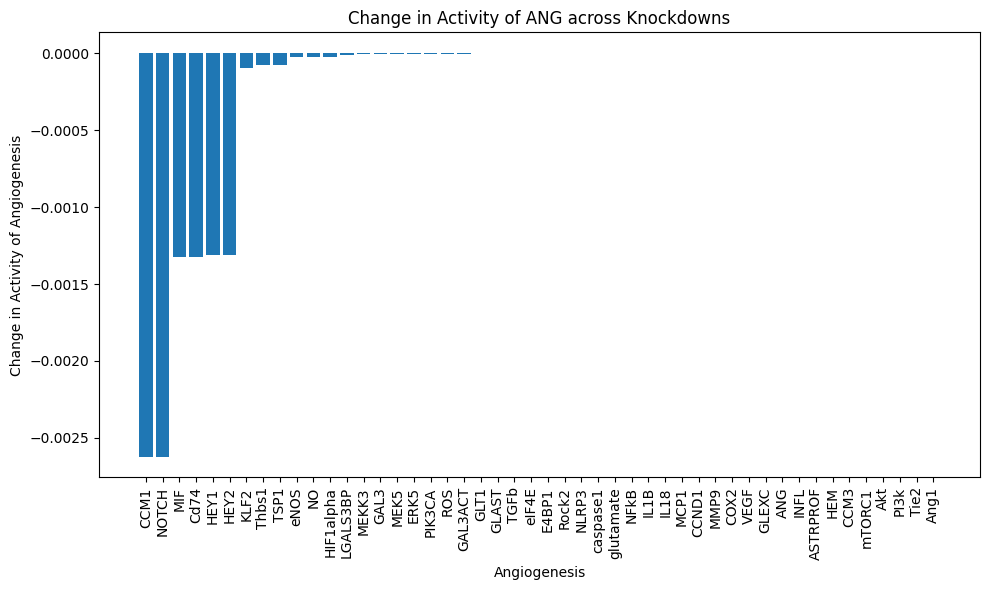

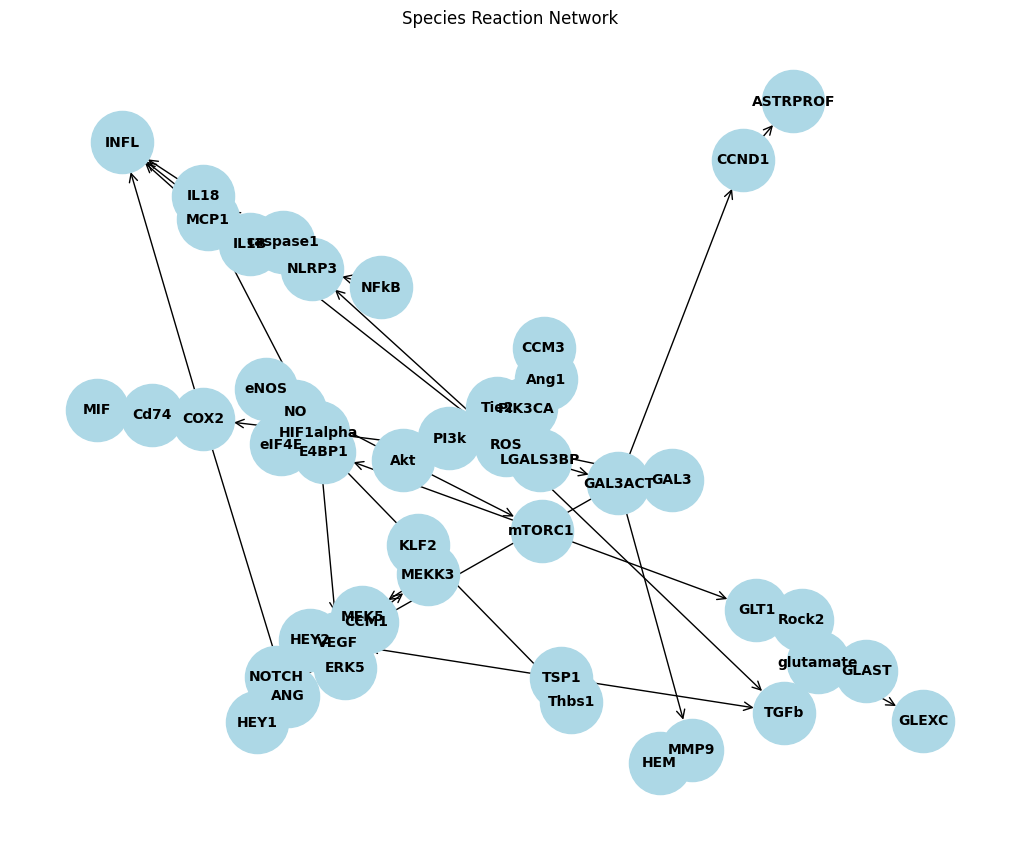

In [218]:
ANG_sorted_change = gene_effect_on_symptom(angiogenesis)
print(ANG_sorted_change)
ANG_signaling_network = make_signaling_network(reactions_df, ANG_sorted_change)
ANG_best_path, ANG_best_path_cost = find_best_treatment_path(ANG_signaling_network, source="CCM3", target="ANG", weight="cost")
print("Shortest path for Angiogenesis based on cost:", ANG_best_path)
print("Total Angiogenesis path cost:", ANG_best_path_cost)
plot_change(ANG_sorted_change, angiogenesis, "Angiogenesis")
display_network(ANG_signaling_network)

In [219]:
ang_species = ANG_sorted_change.keys()
ang_values = ANG_sorted_change.values()
ANG_sorted_change_df = pd.DataFrame(ang_values, ang_species)
print(ANG_sorted_change_df)

                      0
CCM1      -2.626452e-03
NOTCH     -2.621864e-03
MIF       -1.322233e-03
Cd74      -1.322233e-03
HEY1      -1.308996e-03
HEY2      -1.308996e-03
KLF2      -9.235303e-05
Thbs1     -7.653560e-05
TSP1      -7.549903e-05
eNOS      -2.183962e-05
NO        -2.183562e-05
HIF1alpha -2.165279e-05
LGALS3BP  -8.461333e-06
MEKK3     -5.757431e-06
GAL3      -5.578036e-06
MEK5      -5.120261e-06
ERK5      -5.107537e-06
PIK3CA    -3.852073e-06
ROS       -3.192842e-06
GAL3ACT   -8.579043e-07
GLT1      -6.654800e-07
GLAST     -6.654233e-07
TGFb      -6.588064e-07
eIF4E     -6.443222e-07
E4BP1     -6.125139e-07
Rock2     -4.511558e-07
NLRP3     -3.486895e-07
caspase1  -5.787918e-08
glutamate -5.280986e-08
NFkB      -3.388204e-08
IL1B      -2.892876e-08
IL18      -1.305928e-09
MCP1      -6.146982e-10
CCND1     -1.162265e-16
MMP9      -1.162265e-16
COX2       0.000000e+00
VEGF       0.000000e+00
GLEXC      0.000000e+00
ANG        0.000000e+00
INFL       0.000000e+00
ASTRPROF   0.000

## Glutamate Excitotoxicity

c:\Users\ishah\OneDrive\Documents\Price Lab Research\generate drug list\generate drug list\NetfluxODE.py:117: RuntimeWarning: invalid value encountered in scalar power
  fact = w*(beta*x**n)/(K**n+x**n)


Graph contains a negative weight cycle.
Shortest path for Glutamate Excitotoxicity based on cost: ['CCM3', 'Ang1', 'Tie2', 'PI3k', 'Akt', 'mTORC1', 'GLT1', 'glutamate', 'GLEXC']
Total Glutamate Excitotoxicity path cost: -0.005700562209266329


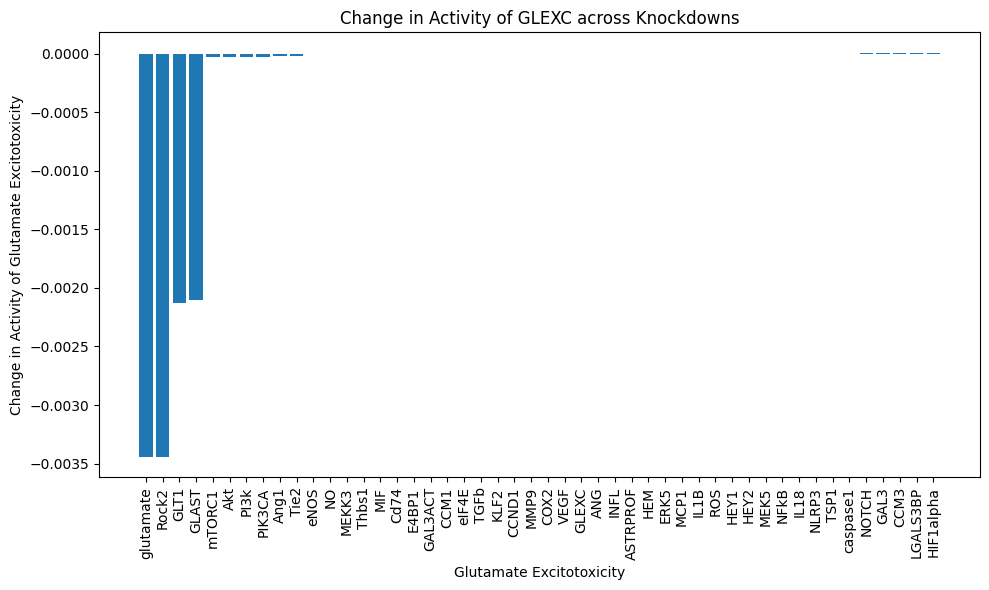

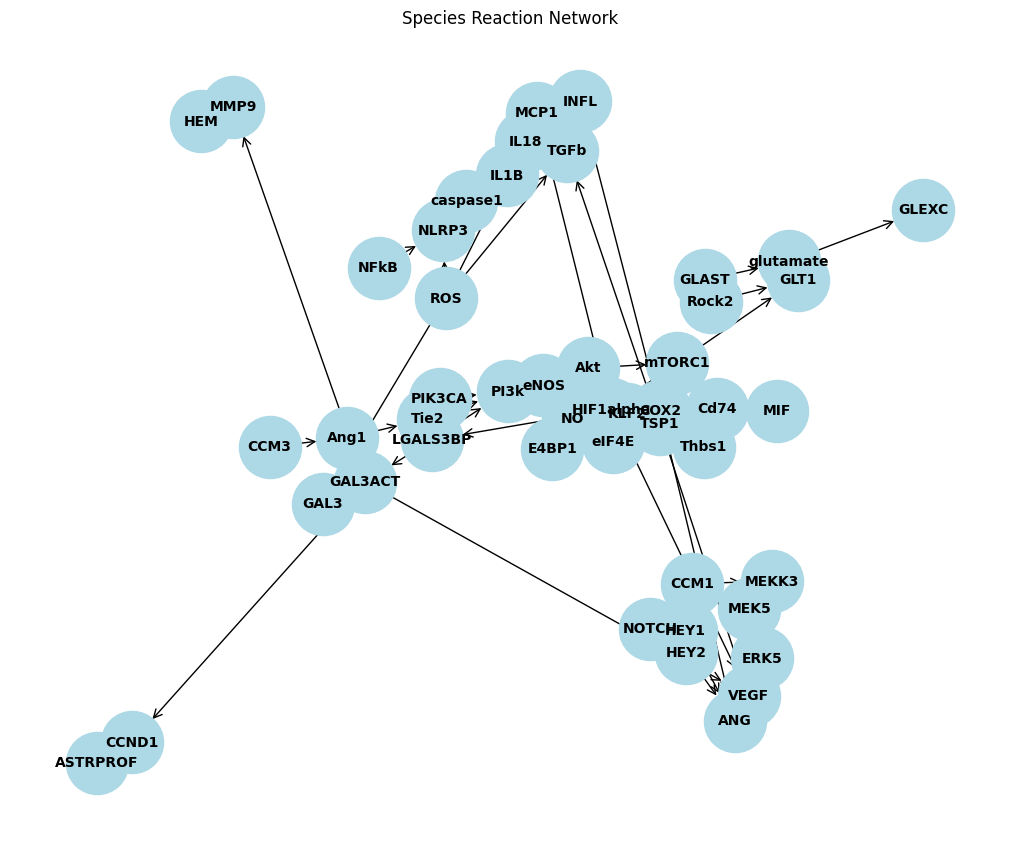

In [220]:
GLEXC_sorted_change = gene_effect_on_symptom(glutamate_excitotoxicity)
GLEXC_signaling_network = make_signaling_network(reactions_df, GLEXC_sorted_change)
GLEXC_best_path, GLEXC_best_path_cost = find_best_treatment_path(GLEXC_signaling_network, source="CCM3", target="GLEXC", weight="cost")
print("Shortest path for Glutamate Excitotoxicity based on cost:", GLEXC_best_path)
print("Total Glutamate Excitotoxicity path cost:", GLEXC_best_path_cost)
plot_change(GLEXC_sorted_change, glutamate_excitotoxicity, "Glutamate Excitotoxicity")
display_network(GLEXC_signaling_network)

## Neuroinflammation

Graph contains a negative weight cycle.
Shortest path for Neuroinflammation based on cost: ['CCM3', 'Ang1', 'Tie2', 'PI3k', 'Akt', 'eNOS', 'NO', 'HIF1alpha', 'MCP1', 'INFL']
Total Neuroinflammation path cost: -0.0030986086840882887


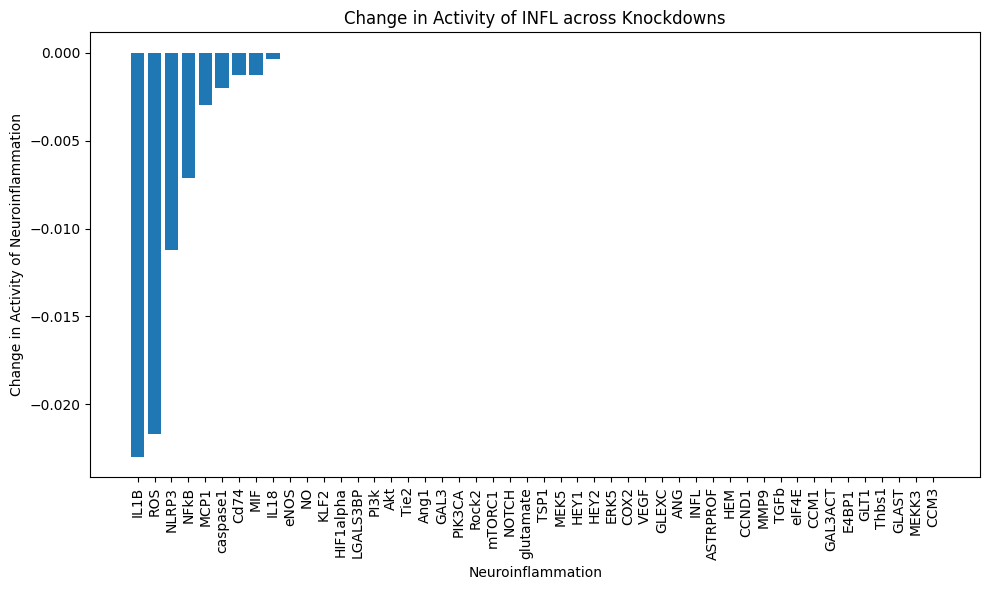

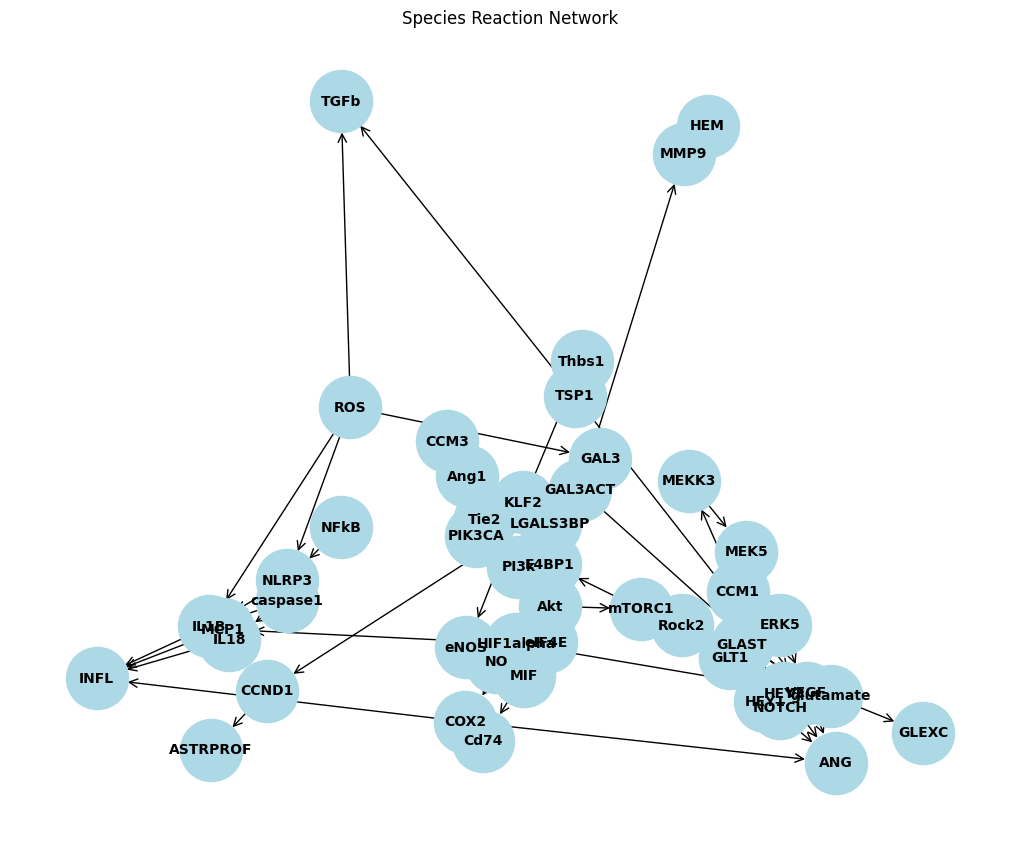

In [221]:
INFL_sorted_change = gene_effect_on_symptom(neuroinflammation)
INFL_signaling_network = make_signaling_network(reactions_df, INFL_sorted_change)
INFL_best_path, INFL_best_path_cost = find_best_treatment_path(INFL_signaling_network, source="CCM3", target="INFL", weight="cost")
print("Shortest path for Neuroinflammation based on cost:", INFL_best_path)
print("Total Neuroinflammation path cost:", INFL_best_path_cost)
plot_change(INFL_sorted_change, neuroinflammation, "Neuroinflammation")
display_network(INFL_signaling_network)

## Astrocyte Proliferation

Graph contains a negative weight cycle.
Shortest path for Astrocyte Proliferation based on cost: ['CCM3', 'Ang1', 'Tie2', 'PI3k', 'Akt', 'eNOS', 'NO', 'HIF1alpha', 'LGALS3BP', 'GAL3ACT', 'CCND1', 'ASTRPROF']
Total Astrocyte Proliferation path cost: -2.5478358973963535e-15


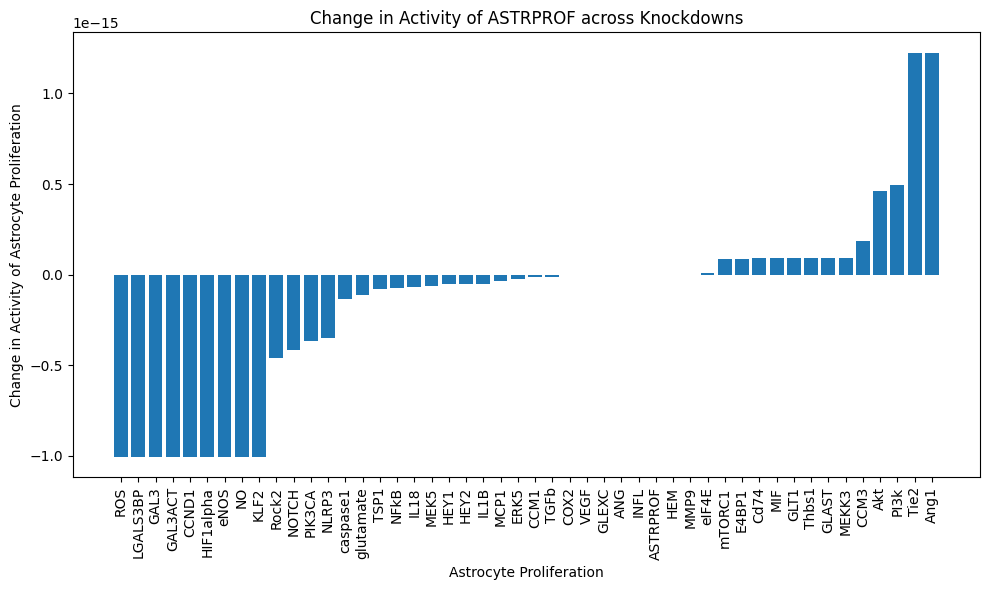

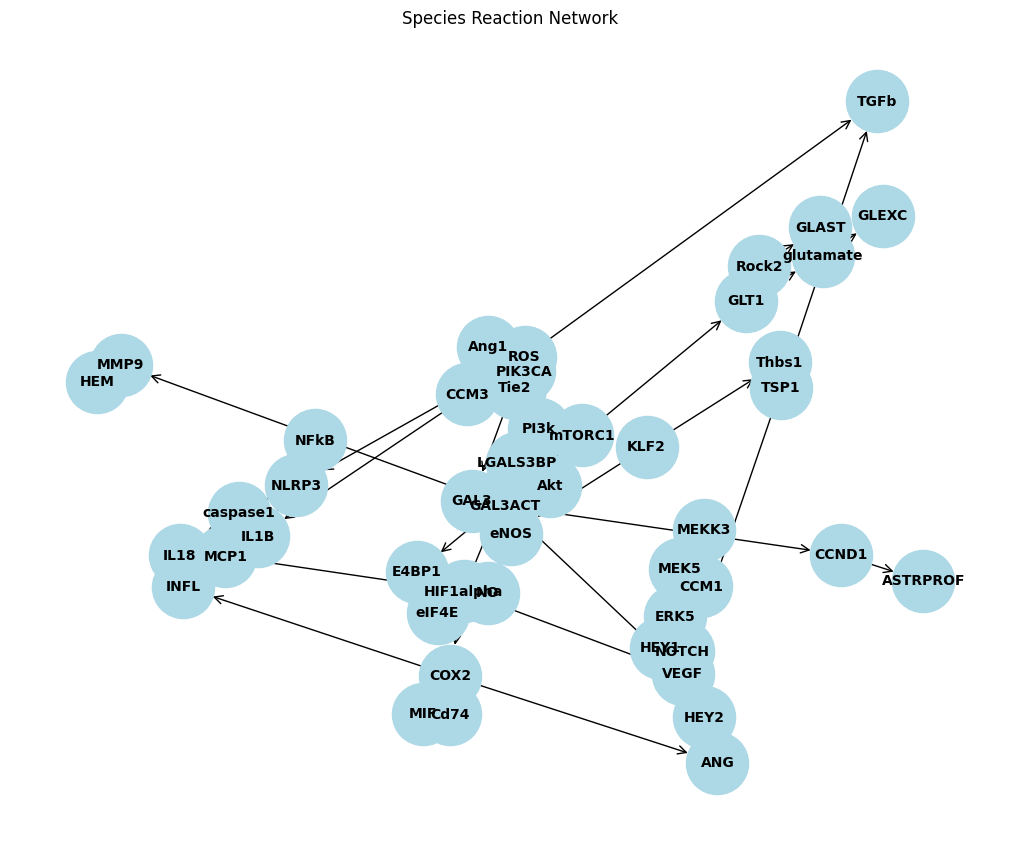

In [222]:
ASTRPROF_sorted_change = gene_effect_on_symptom(astrocyte_proliferation)
ASTRPROF_signaling_network = make_signaling_network(reactions_df, ASTRPROF_sorted_change)
ASTRPROF_best_path, ASTRPROF_best_path_cost = find_best_treatment_path(ASTRPROF_signaling_network, source="CCM3", target="ASTRPROF", weight="cost")
print("Shortest path for Astrocyte Proliferation based on cost:", ASTRPROF_best_path)
print("Total Astrocyte Proliferation path cost:", ASTRPROF_best_path_cost)
plot_change(ASTRPROF_sorted_change, astrocyte_proliferation, "Astrocyte Proliferation")
display_network(ASTRPROF_signaling_network)

## Hemorrhage

Graph contains a negative weight cycle.
Shortest path for Hemorrhage based on cost: ['CCM3', 'Ang1', 'Tie2', 'PI3k', 'Akt', 'eNOS', 'NO', 'HIF1alpha', 'LGALS3BP', 'GAL3ACT', 'MMP9', 'HEM']
Total Hemorrhage path cost: -2.5478358973963535e-15


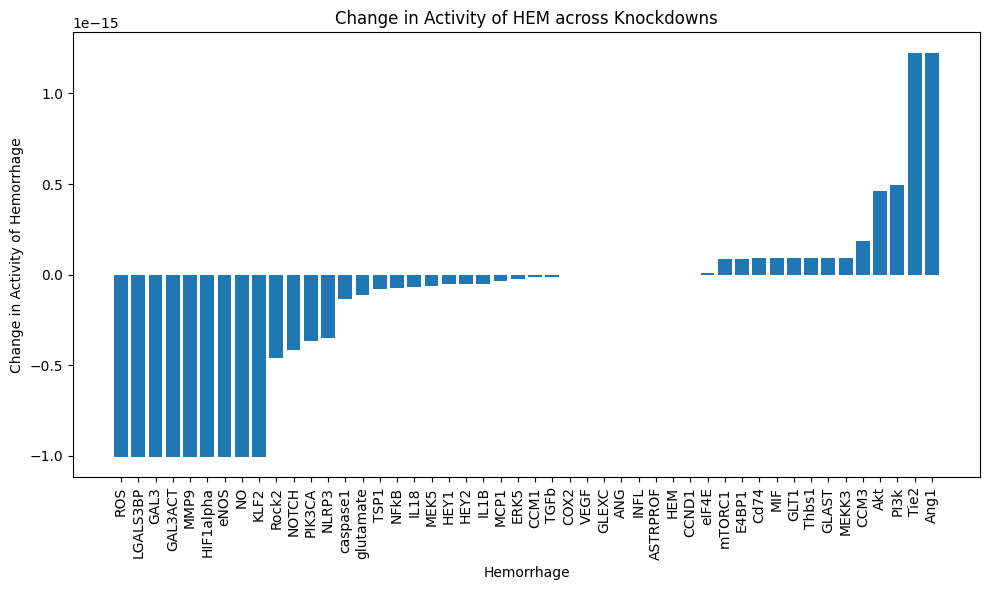

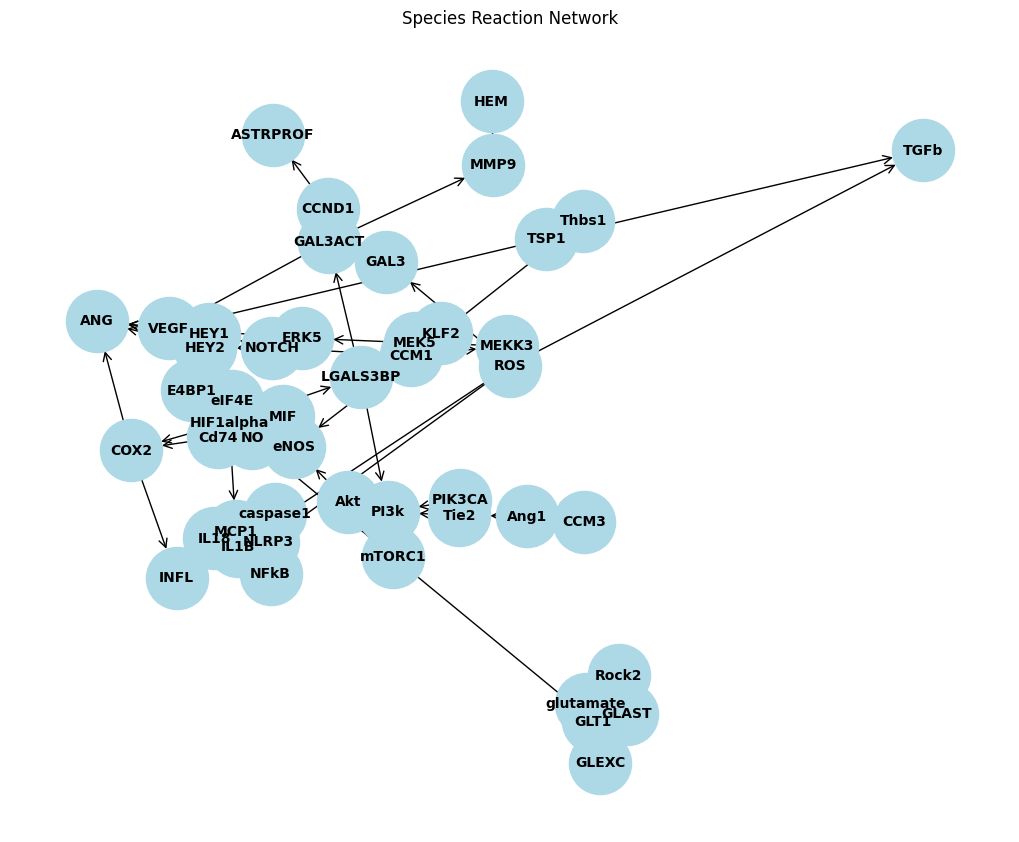

In [223]:
HEM_sorted_change = gene_effect_on_symptom(hemorrhage)
HEM_signaling_network = make_signaling_network(reactions_df, HEM_sorted_change)
HEM_best_path, HEM_best_path_cost = find_best_treatment_path(HEM_signaling_network, source="CCM3", target="HEM", weight="cost")
print("Shortest path for Hemorrhage based on cost:", HEM_best_path)
print("Total Hemorrhage path cost:", HEM_best_path_cost)
plot_change(HEM_sorted_change, hemorrhage, "Hemorrhage")
display_network(HEM_signaling_network)

Change validation to have increases and decreases
    -make validation figure

find more nodes for astrprof

further investigate common pathways seen as most efficient (expand it)

change source from CCM3
